In [75]:
import pandas as pd
import scipy as sp
import sklearn as skl
import numpy as np
import matplotlib as mtplt
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
# import tensorflow as tf
import scipy.optimize as opt
import os
import subprocess
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import datasets
from IPython.display import display, HTML

In [76]:
df =  pd.read_csv('On_Time_On_Time_Performance_2015_1.csv', low_memory=False)

# investigación
1. patrones
    - demoreas:
        - existe una fuerte relacion entre el tiempo de Taxi y las demoras
        - el aeropuerto con mayores salidas retrasadas por clima es "ORD" y en segundo "ATL"
        - el aerpuerto con mayores llegadas retrasadas por clima es "ORD" y en segundo "DFW"
        - la distancia no parece tener ningun impacto sobre el retraso de los vuelos
        - la aerolinea con mas demoras es la id: 19393 y en segundo la id: 19790
        - el salir con tempo de anticipacion no es seguro de evitar un retraso a la llegada
        - no hay una relacion directa entre el retraso/adelanto en el tiempo de salida y el de llegada
    - cancelaciones:
        - el aeropuerto con mas salidas canceladas es "ORD" y en segundo "LGA"
        - el aerpuerto con mas llegadas canceladas es "ORD" y en segundo "LGA"
        - las aerolienas con mas cancelaciones son id: 20398, y ID: 19393
        - es posible que las cancelaciones esten relacioandas al clima
        - el codigo de cancelacion mas repetido es el B, mientras que el D solo aparece 1 vez
2. de las 110 columnas (variables) del data set creemos que las mas relevantes son
    - las que tienen datos de los retraros
    - cancelaciones 
    - ID de la aerolinea
    - origen y detino 
 
# conclusiones 
la aerolinea 19977 es la mas probable en tener un retraso con un 59.36% de retraso en sus vuelos

In [77]:
red = df[['Cancelled','ArrDelay','DepDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','FlightDate','AirlineID','Origin','Dest','TaxiOut','TaxiIn','AirTime','Distance','TotalAddGTime','CancellationCode']]

In [78]:
dems = red[(red['ArrDelay'] >0) | (red['DepDelay'] >0) | (red['CarrierDelay'] >0) 
           | (red['WeatherDelay'] >0) | (red['NASDelay'] >0) | (red['SecurityDelay'] >0)
           | (red['LateAircraftDelay'] >0)]
print("vuelos con retraso por taxi in")
print(dems[(dems['TaxiIn']>0)].shape[0])
print("vuelos con retraso por taxi out")
print(dems[(dems['TaxiOut']>0)].shape[0])
print("vuelos con retraso por taxi in Y taxi out")
print(dems[(dems['TaxiIn']>0) | dems['TaxiOut']>0].shape[0])

#display(dems[(dems['TaxiIn']>0) | dems['TaxiOut']>0])

vuelos con retraso por taxi in
229007
vuelos con retraso por taxi out
229238
vuelos con retraso por taxi in Y taxi out
229238


In [79]:
print("vuelos con retraso por clima")
print(dems[(dems['WeatherDelay']>0)].shape[0])
kuz = dems[(dems['WeatherDelay']>0)]
print("retrasos por clima segun aeropeurtos de origen")
print(pd.Series.value_counts(kuz['Origin']))
print("retrasos por clima segun aeropeurtos de llegada")
print(pd.Series.value_counts(kuz['Dest']))
#display(kuz)

vuelos con retraso por clima
6383
retrasos por clima segun aeropeurtos de origen
ORD    2147
ATL     331
DFW     310
JFK     301
DEN     249
LGA     247
BOS     208
DTW     134
LAX     118
SFO     112
DCA     109
MDW     101
BWI      83
PHL      75
EWR      67
MSP      60
PHX      59
SEA      58
MKE      56
GRR      53
SJC      52
IAD      47
LAS      46
BDL      45
SLC      42
MCO      39
CMH      39
DAL      38
PIT      31
CLE      29
       ... 
HRL       1
OKC       1
LRD       1
JLN       1
MDT       1
MFE       1
HOB       1
PUB       1
MKG       1
SPI       1
AVP       1
TWF       1
TLH       1
IMT       1
FCA       1
SUN       1
CAE       1
MHT       1
KTN       1
TYS       1
SDF       1
EUG       1
GCC       1
LSE       1
FLG       1
MHK       1
ROA       1
UST       1
ELM       1
BIL       1
Name: Origin, dtype: int64
retrasos por clima segun aeropeurtos de llegada
ORD    378
DFW    326
ATL    239
DEN    189
IAH    176
LAX    171
LGA    162
SFO    157
BOS    138
DTW    138
PH

In [80]:
print("retrasos por distancias")
dist = pd.DataFrame({'count' : dems.groupby( [ 'Distance'] ).size()}).reset_index()
dist.sort_values('count',ascending=False,inplace=True)
display(dist)

retrasos por distancias


,Distance,count
206,337.0,1775
618,862.0,1280
1182,2475.0,1033
659,925.0,996
406,594.0,996
569,802.0,989
621,867.0,988
294,447.0,946
258,404.0,930
122,236.0,896


In [81]:
chow = red[(red['Cancelled']==1)]
print("origins")
print(pd.Series.value_counts(chow['Origin']))
print("destinations")
print(pd.Series.value_counts(chow['Dest']))
print("airlien ids")
print(pd.Series.value_counts(chow['AirlineID']))

origins
ORD    1118
LGA     882
EWR     659
BOS     648
DFW     524
JFK     462
DCA     329
PHL     300
SFO     294
DEN     273
ATL     263
LAX     251
MDW     236
DTW     201
MCO     189
BWI     158
FLL     141
IAH     139
MIA     133
CLT     129
MSP     110
TPA     103
BDL     103
RDU     100
BNA      95
STL      90
PHX      89
LAS      87
CLE      87
CMH      84
       ... 
ABR       2
SCC       2
BZN       2
EYW       2
ABY       2
FAY       1
ADQ       1
ECP       1
SMX       1
OTH       1
BJI       1
BQK       1
PIH       1
HDN       1
YUM       1
AEX       1
AVL       1
MQT       1
MEI       1
YAK       1
MMH       1
PSG       1
OTZ       1
PHF       1
BLI       1
FAI       1
CRW       1
CEC       1
ITO       1
PBG       1
Name: Origin, dtype: int64
destinations
ORD    1218
LGA     848
EWR     674
BOS     658
DFW     570
JFK     469
PHL     310
SFO     307
DCA     306
DEN     295
ATL     287
LAX     260
DTW     213
MDW     210
MCO     188
IAH     182
CLT     165
BWI     163
FLL 

In [82]:
#display(dems)
print (pd.Series.value_counts(dems['AirlineID']))

19393    50907
19790    25345
20304    23649
20366    23344
19977    22792
19805    21968
20398    16237
20355    15248
20409    10442
19930     5491
20416     4856
20436     3916
19690     2993
21171     2208
Name: AirlineID, dtype: int64


In [83]:
agrupamela = dems.groupby('AirlineID')


19393         Axes(0.1,0.736957;0.173913x0.163043)
19690    Axes(0.308696,0.736957;0.173913x0.163043)
19790    Axes(0.517391,0.736957;0.173913x0.163043)
19805    Axes(0.726087,0.736957;0.173913x0.163043)
19930         Axes(0.1,0.541304;0.173913x0.163043)
19977    Axes(0.308696,0.541304;0.173913x0.163043)
20304    Axes(0.517391,0.541304;0.173913x0.163043)
20355    Axes(0.726087,0.541304;0.173913x0.163043)
20366         Axes(0.1,0.345652;0.173913x0.163043)
20398    Axes(0.308696,0.345652;0.173913x0.163043)
20409    Axes(0.517391,0.345652;0.173913x0.163043)
20416    Axes(0.726087,0.345652;0.173913x0.163043)
20436             Axes(0.1,0.15;0.173913x0.163043)
21171        Axes(0.308696,0.15;0.173913x0.163043)
dtype: object

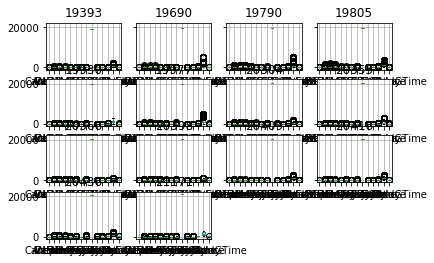

In [84]:
agrupamela.boxplot()

In [85]:
cc = red[red['CancellationCode']!= np.NaN]
print(pd.Series.value_counts(cc['CancellationCode']))

B    7020
A    2874
C    2087
D       1
Name: CancellationCode, dtype: int64


'grafica de aerolinea con mayor numero de retrasos'

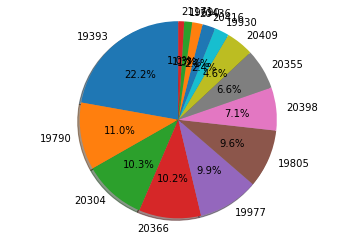

None

'grafica de aeropuerto origen con mayor numero de retrasos'

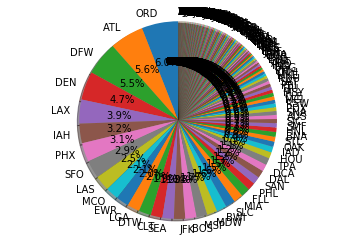

None

'grafica de aeropuerto destino con mayor numero de retrasos'

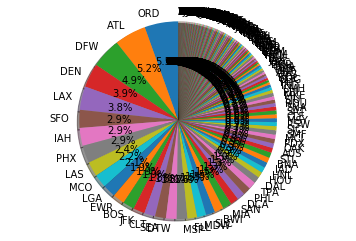

None

In [86]:
# get all charts
# red= cancels, dems = delays
airID = (pd.Series.value_counts(dems['AirlineID']))
labels = airID.to_dict()
arr =[]
for key in labels:
    arr.append(int(key))
#by airline id
sizes =[]
for zain in arr:
    sizes.append(labels[zain])
explode = (0,0,0,0,0,0,0,0,0,0,0,0,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=arr, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
display("grafica de aerolinea con mayor numero de retrasos")
display(plt.show())


#mas retrasos por aeropuerto origen
airport = (pd.Series.value_counts(dems['Origin']))
labels = airport.to_dict()
arr =[]
for key in labels:
    arr.append(str(key))
#by airline id
sizes =[]
for zain in arr:
    sizes.append(labels[zain])
#display(sizes)
explode = (0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=arr, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
display("grafica de aeropuerto origen con mayor numero de retrasos")
display(plt.show())

#aeropuerto por destino 
airport = (pd.Series.value_counts(dems['Dest']))
labels = airport.to_dict()
arr =[]
for key in labels:
    arr.append(str(key))
#by airline id
sizes =[]
for zain in arr:
    sizes.append(labels[zain])
#display(sizes)
explode = (0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=arr, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
display("grafica de aeropuerto destino con mayor numero de retrasos")
display(plt.show())

'grafica de aerolinea con mayor numero de cancelaciones'

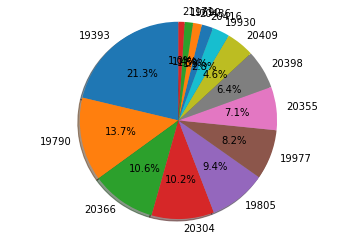

None

'grafica de aeropuerto origen con mayor numero de cancelaciones'

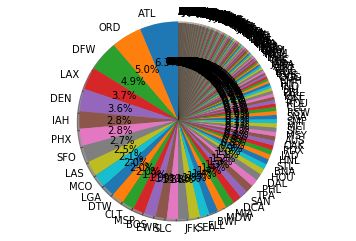

None

'grafica de aeropuerto destino con mayor numero de cancelaciones'

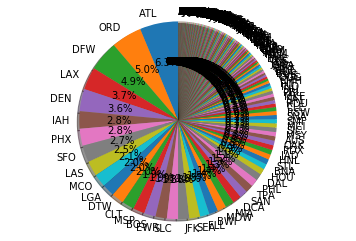

None

In [87]:
# graficas de cancelaciones
airID = (pd.Series.value_counts(red['AirlineID']))
labels = airID.to_dict()
arr =[]
for key in labels:
    arr.append(int(key))
#by airline id
sizes =[]
for zain in arr:
    sizes.append(labels[zain])
explode = (0,0,0,0,0,0,0,0,0,0,0,0,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=arr, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
display("grafica de aerolinea con mayor numero de cancelaciones")
display(plt.show())


#mas cancel por aeropuerto origen
airport = (pd.Series.value_counts(red['Origin']))
labels = airport.to_dict()
arr =[]
for key in labels:
    arr.append(str(key))
#by airline id
sizes =[]
for zain in arr:
    sizes.append(labels[zain])
#display(sizes)
explode = (0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=arr, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
display("grafica de aeropuerto origen con mayor numero de cancelaciones")
display(plt.show())

#aeropuerto por destino 
airport = (pd.Series.value_counts(red['Dest']))
labels = airport.to_dict()
arr =[]
for key in labels:
    arr.append(str(key))
#by airline id
sizes =[]
for zain in arr:
    sizes.append(labels[zain])
#display(sizes)
explode = (0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=arr, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
display("grafica de aeropuerto destino con mayor numero de cancelaciones")
display(plt.show())

'aeropuerto salida con mayor numero de retrasos por clima'

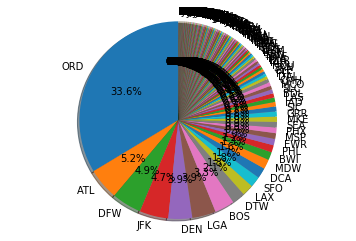

None

'aeropuerto salida con mayor numero de retrasos por carrier'

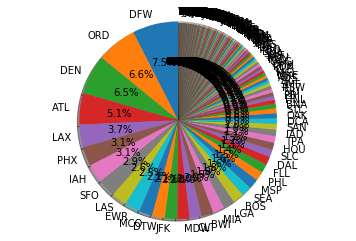

None

'aeropuerto salida con mayor numero de retrasos por seguridad'

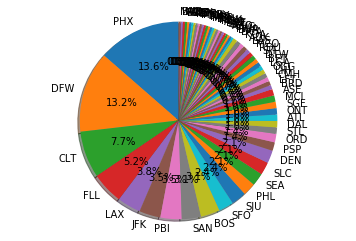

None

In [104]:
# causas de retrasos
# CarrierDelay,WeatherDelay,SecurityDelay,TaxiOut,TaxiIn
tutzke = dems[(dems['WeatherDelay']>0)]

airID = (pd.Series.value_counts(tutzke['Origin']))
labels = airID.to_dict()
arr =[]
for key in labels:
    arr.append(str(key))
sizes =[]
for zain in arr:
    sizes.append(labels[zain])
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=arr, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
display("aeropuerto salida con mayor numero de retrasos por clima")
display(plt.show())


tutzke = dems[(dems['CarrierDelay']>0)]

airID = (pd.Series.value_counts(tutzke['Origin']))
labels = airID.to_dict()
arr =[]
for key in labels:
    arr.append(str(key))
sizes =[]
for zain in arr:
    sizes.append(labels[zain])
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=arr, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
display("aeropuerto salida con mayor numero de retrasos por carrier")
display(plt.show())

tutzke = dems[(dems['SecurityDelay']>0)]

airID = (pd.Series.value_counts(tutzke['Origin']))
labels = airID.to_dict()
arr =[]
for key in labels:
    arr.append(str(key))
sizes =[]
for zain in arr:
    sizes.append(labels[zain])
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=arr, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
display("aeropuerto salida con mayor numero de retrasos por seguridad")
display(plt.show())

'aeropuerto salida con mayor numero de retrasos por TaxiIn'

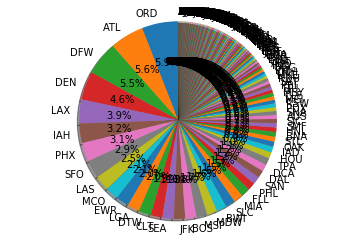

None

'aeropuerto salida con mayor numero de retrasos por TaxiOut'

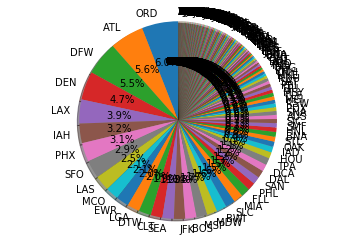

None

In [105]:
tutzke = dems[(dems['TaxiIn']>0)]

airID = (pd.Series.value_counts(tutzke['Origin']))
labels = airID.to_dict()
arr =[]
for key in labels:
    arr.append(str(key))
sizes =[]
for zain in arr:
    sizes.append(labels[zain])
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=arr, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
display("aeropuerto salida con mayor numero de retrasos por TaxiIn")
display(plt.show())

tutzke = dems[(dems['TaxiOut']>0)]

airID = (pd.Series.value_counts(tutzke['Origin']))
labels = airID.to_dict()
arr =[]
for key in labels:
    arr.append(str(key))
sizes =[]
for zain in arr:
    sizes.append(labels[zain])
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=arr, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
display("aeropuerto salida con mayor numero de retrasos por TaxiOut")
display(plt.show())

{'ArrDelay': 5606869.0,
 'CarrierDelay': 1708155.0,
 'DepDelay': 5566175.0,
 'NASDelay': 1278055.0,
 'SecurityDelay': 6700.0,
 'TaxiIn': 1890480.0,
 'TaxiOut': 4265796.0,
 'WeatherDelay': 263087.0}

'total de retrasos por categorias'

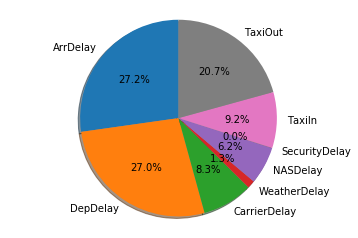

None

In [123]:
demsred =dems[['ArrDelay','DepDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','AirlineID','Origin','Dest','TaxiOut','TaxiIn']]
demsred2 = dems[['ArrDelay','DepDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','TaxiOut','TaxiIn']]
totals = {'ArrDelay': demsred2['ArrDelay'].sum() ,'DepDelay': demsred2['DepDelay'].sum(),'CarrierDelay' : demsred2['CarrierDelay'].sum(),'WeatherDelay': demsred2['WeatherDelay'].sum(),'NASDelay': demsred2['NASDelay'].sum(),'SecurityDelay': demsred2['SecurityDelay'].sum(),'TaxiIn': demsred2['TaxiIn'].sum(),'TaxiOut': demsred2['TaxiOut'].sum()}
display(totals)
arr =[]
for key in totals:
    arr.append(str(key))
sizes =[]
for zain in arr:
    sizes.append(totals[zain])
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=arr, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
display("total de retrasos por categorias")
display(plt.show())